## Random Numbers and Path Generation
#### based in part on Hilpisch chapter 12: Stochastics

### 1) Uniform random number generation

In [1]:
import math
import numpy as np
import numpy.random as npr
from pylab import plt, mpl

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
npr.seed(100) # the seed allows for reproducibility of pseudo-random numbers
np.set_printoptions(precision=4) # default precision for printing

In [4]:
# uniform distribution random numbers - 1D array
npr.rand(10)

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [5]:
# uniform distribution random numbers - 2D array
npr.rand(5, 5)

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365]])

In [6]:
a = 5. # lower limit
b = 10. # upper limit
npr.rand(10) * (b-a) + a # generate random variables within the upper and lower limits

array([9.4521, 9.9046, 5.2997, 9.4527, 7.8845, 8.7124, 8.1509, 7.9092,
       5.1022, 6.0501])

In [7]:
npr.rand(5,5) * (b-a) + a # generate matrix of random variables within upper and lower limits

array([[7.7234, 8.8456, 6.2535, 6.4295, 9.262 ],
       [9.875 , 9.4243, 6.7975, 7.9943, 6.774 ],
       [6.701 , 5.8904, 6.1885, 5.2243, 7.5272],
       [6.8813, 7.964 , 8.1497, 5.713 , 9.6692],
       [9.7319, 8.0115, 6.9388, 6.8159, 6.0217]])

### 2) Normally distributed random number generation

In [8]:
# generate normal random observations
I = 1000
normalValues = npr.standard_normal(I)
type(normalValues)

numpy.ndarray

In [9]:
# review the first few generated normal values
normalValues[:5]

array([-0.94  , -0.8279,  0.1089,  0.5078, -0.8622])

In [10]:
# what are some basic stats on the generated values
import scipy.stats as scs
scs.describe(normalValues)

DescribeResult(nobs=1000, minmax=(-3.209955381978046, 3.85793967348964), mean=-0.007384995387244661, variance=1.0997940664537351, skewness=0.1333605275941821, kurtosis=0.25866247537476106)

(array([  5.,  10.,  30.,  51., 115., 146., 192., 163., 134.,  79.,  40.,
         20.,  10.,   3.,   2.]),
 array([-3.21  , -2.7388, -2.2676, -1.7964, -1.3252, -0.854 , -0.3828,
         0.0884,  0.5596,  1.0308,  1.502 ,  1.9732,  2.4444,  2.9156,
         3.3867,  3.8579]),
 <BarContainer object of 15 artists>)

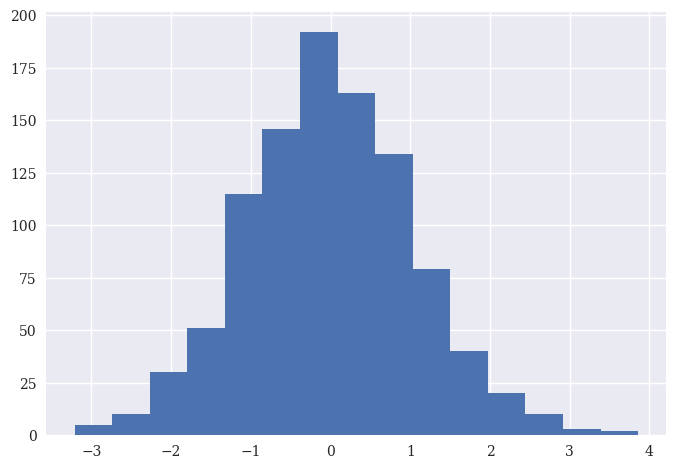

In [11]:
# view a histogram of the generated values
import matplotlib.pyplot as plt
plt.hist(normalValues, bins=15)

## 3) Path generation using geometric brownian motion
### assumes constant drift and variance 

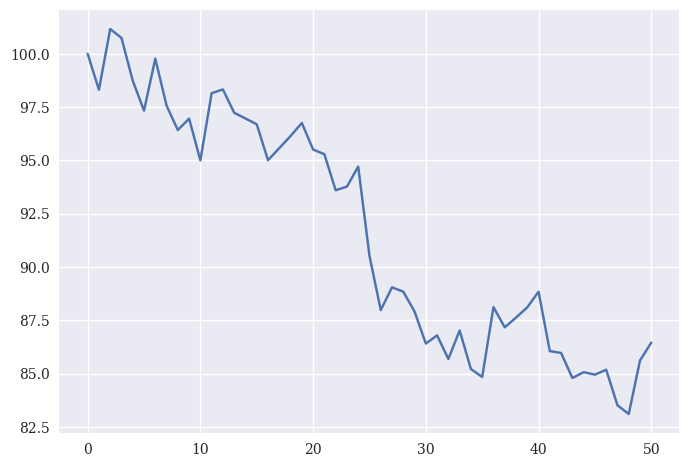

In [12]:
# Generation a single path using geometric brownian motion
T = 2.0 # number of years
M = 50 # number of discrete time intervals
dt = T / M # time interval for each step
S = np.zeros(M+1) # a stock price's simulated path
r = .01 # risk free interest rate
sigma = .1 # constant volatility
S[0] = 100 # starting price
for t in range(1, M+1):
   S[t] = S[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt +
           sigma * math.sqrt(dt) * npr.standard_normal(1))
plt.plot(S)

In [13]:
# generate multiple paths following geometric brownian motion
I = 10000 # number of simulation (paths)
T = 2.0 # horizon in years
M = 50 # the number of discrete time intervals
dt = T / M # time interval for each step
S = np.zeros((M+1, I)) # define matrix of zeros
r = 0.01 # risk-free interest rate
sigma = 0.20 # constant volatility
S[0] = 100 # starting price
# for each time slice, generate a new price, based on the prior price and
#  r, sigma, dt, and unit normal random numbers
for t in range(1, M+1):
   S[t] = S[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt +
     sigma * math.sqrt(dt) * npr.standard_normal(I))

In [14]:
# Some statistics for the set of ending prices
import scipy.stats as scs
scs.describe(S[-1])

DescribeResult(nobs=10000, minmax=(34.74945326371914, 310.598105486359), mean=102.16590173084964, variance=827.9868351471048, skewness=0.8303895219578918, kurtosis=1.3033573102120855)

Text(0, 0.5, 'frequency')

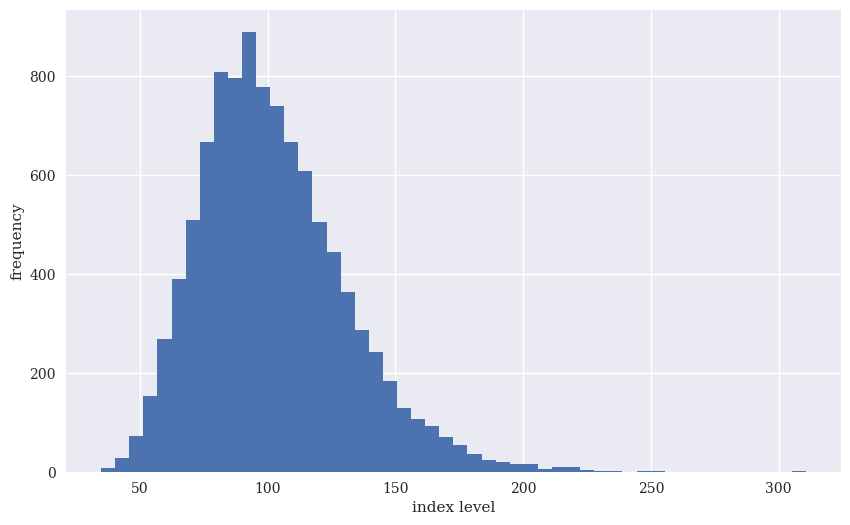

In [15]:
# what is the distribution of the ending prices (among all paths)
plt.figure(figsize=(10,6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

Text(0, 0.5, 'index level')

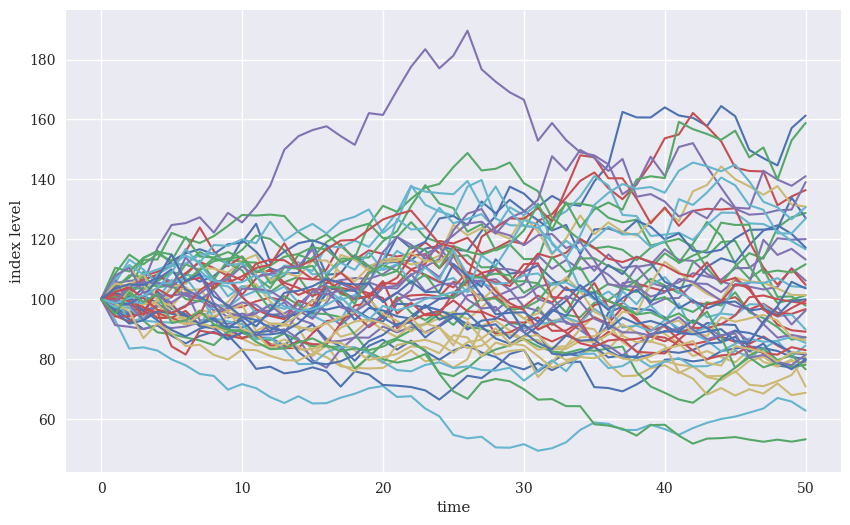

In [16]:
# Plot the simulated paths
npathsToPlot = 50
plt.figure(figsize=(10,6))
plt.plot(S[:,:npathsToPlot], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')